<a href="https://colab.research.google.com/github/ShauryaDusht/machine-learning-basics/blob/main/LAB4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time

## **Data Preparation**


(a) Read or create the data as .csv file.

(b) Plot the input-output relation for a single variables also for the multiple variables.


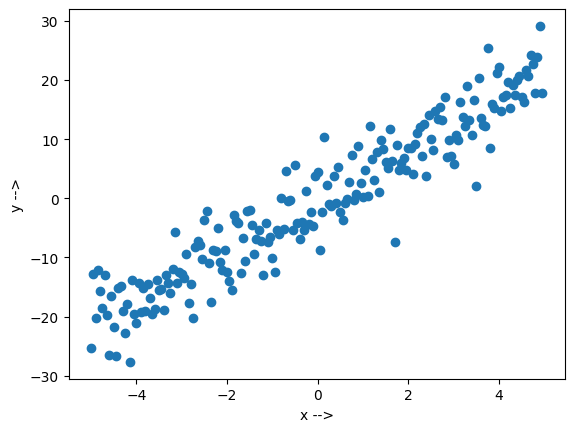

In [ ]:
# Make a linear equation y = 4.3 x + c

x = np.arange(-5, 5, 0.05)
noise = np.random.randn(200) * 4
y = 4.3 * x + noise

# plot line
plt.scatter(x, y)
plt.ylabel('y -->')
plt.xlabel('x -->')
plt.show()

In [ ]:
# save data generated in csv file

data = pd.DataFrame({'x': x, 'y': y})
data.to_csv('data.csv', index=False)



## **Regression**

(c) Perform linear regression using Normal Equation, Formulation, and Gradient Descent  and compare the results. (with and without using the builtin functions)

### Using Normal Equation

Weight: 4.245791936782776 Bias: -0.39652826201609986


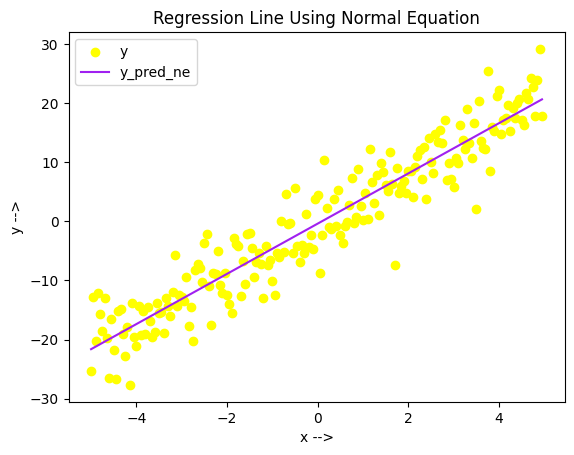

In [ ]:
start = time()

def normal_equation(x, y):
    # Add a column of ones to x for the bias term
    X_b = np.c_[np.ones((x.shape[0], 1)), x]
    # Compute the weights using the normal equation
    return np.dot(np.linalg.inv(np.dot(X_b.T, X_b)), np.dot(X_b.T, y))


bias, weight = normal_equation(x.reshape(-1, 1), y)

print("Weight:", weight, "Bias:", bias)


y_pred_ne = weight * x + bias
plt.scatter(x, y, color="#FFFF00")
plt.plot(x, y_pred_ne, color='#A020F0')
plt.ylabel('y -->')
plt.xlabel('x -->')
plt.legend(['y', 'y_pred_ne'])
plt.title('Regression Line Using Normal Equation')
plt.show()

end = time()
time_ne = end - start

### Using Formulation

Weight: 4.245791936782778 Bias: -0.3965282620161005


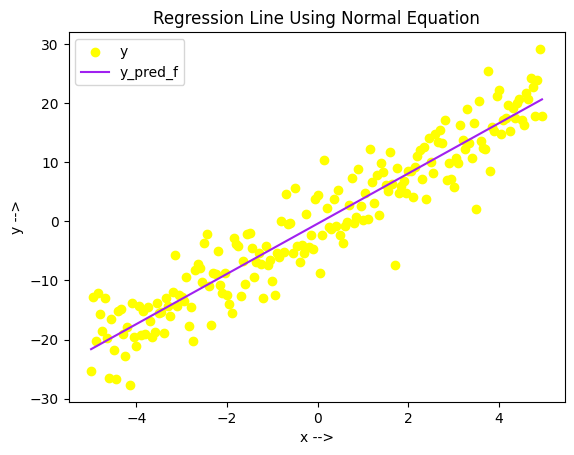

In [ ]:
start = time()

def formulation(x, y):
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  numerator = np.sum((x - x_mean) * (y - y_mean))
  denominator = np.sum((x - x_mean) ** 2)

  m = numerator / denominator
  c = y_mean - m * x_mean

  return m, c

weight, bias = formulation(x, y)
print("Weight:", weight, "Bias:", bias)

# plot regression line vs input data

y_pred_f = weight * x + bias
plt.scatter(x, y, color="#FFFF00")
plt.plot(x, y_pred_f, color='#A020F0')
plt.ylabel('y -->')
plt.xlabel('x -->')
plt.legend(['y', 'y_pred_f'])
plt.title('Regression Line Using Normal Equation')
plt.show()

end = time()
time_f = end - start

## Using Gradient Descent

#### Using Built-in Function

Weight: 4.245791936782777 Bias: -0.39652826201610053


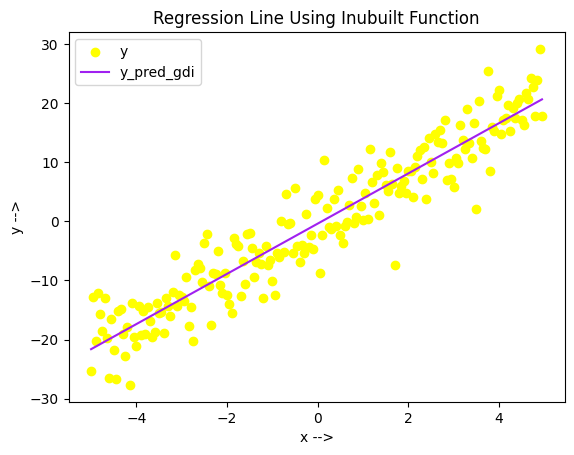

In [ ]:
'''GRADIENT DESCENT USING BUILTIN FUNCTION'''
start = time()
from sklearn import linear_model

my_model = linear_model.LinearRegression()

my_model.fit(x.reshape(-1, 1), y)
print("Weight:", my_model.coef_[0],"Bias:", my_model.intercept_)

# plot regression line and our dataset in same figure

y_pred_gdi = my_model.predict(x.reshape(-1, 1))
plt.scatter(x, y, color="#FFFF00")
plt.plot(x, y_pred_gdi, color='#A020F0')
plt.ylabel('y -->')
plt.xlabel('x -->')
plt.legend(['y', 'y_pred_gdi'])
plt.title('Regression Line Using Inubuilt Function')
plt.show()
end = time()

time_gdi = end - start

#### Without using Built-in Function

Random weight: 0.5607170736409625 Random bias: 0.6756816053584598
Epoch: 0, Loss: 9.780457359962101
Epoch: 1, Loss: 3.6992646563364464
Epoch: 2, Loss: 3.409598606003955
Epoch: 3, Loss: 3.3903261627085737
Epoch: 4, Loss: 3.378212456556072
Epoch: 5, Loss: 3.367208526043851
Epoch: 6, Loss: 3.357410234835787
Epoch: 7, Loss: 3.3493289418403513
Epoch: 8, Loss: 3.342227516966365
Epoch: 9, Loss: 3.3362925483377834
New Weight: 4.247051473036273
New Bias: -0.027021166311303496


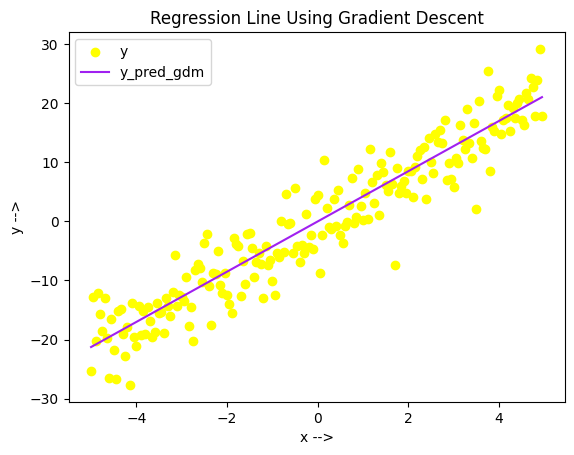

In [ ]:
'''GRADIENT DESCENT USING MAE LOSS FUNCTION'''
def mae(y, y_pred):
  return np.mean(np.abs(y - y_pred))

start = time()
epochs = 10

weight, bias = np.random.rand(2)
print("Random weight:", weight, "Random bias:", bias)
# learning rate
lr = 0.1

for epoch in range(epochs):
  # inference output vector
  y_pred = weight * x + bias

  # calculate error
  error = y - y_pred
  loss = mae(y, y_pred)
  # update weights and bias
  weight += lr * np.mean(error * x)
  bias += lr * np.mean(error)

  print(f'Epoch: {epoch}, Loss: {loss}')

# print updated weights and bias
print("New Weight:",weight)
print("New Bias:",bias)
# plot regression line vs out data using new weights and bias values

y_pred_gdm = weight * x + bias
plt.scatter(x, y, color="#FFFF00")
plt.plot(x, y_pred_gdm, color='#A020F0')
plt.ylabel('y -->')
plt.xlabel('x -->')
plt.legend(['y', 'y_pred_gdm'])
plt.title('Regression Line Using Gradient Descent')
plt.show()
end = time()
time_gdm = end - start

In [ ]:
print("Time taken using Normal equation:", time_ne)
print("Time taken using Normal equation:", time_f)
print("Time taken using Gradient Descent with built-in function:", time_gdi)
print("Time taken using Gradient Descent without built-in function:", time_gdm)

Time taken using Normal equation: 0.2427217960357666
Time taken using Normal equation: 0.32291507720947266
Time taken using Gradient Descent with built-in function: 1.3853442668914795
Time taken using Gradient Descent without built-in function: 0.22419047355651855


In [ ]:
# find mae for each model used
mae_ne = mae(x, y_pred_ne)
mae_f = mae(x, y_pred_f)
mae_gdi = mae(x, y_pred_gdi)
mae_gdm = mae(x, y_pred_gdm)

mae_matrix = np.array([[mae_ne], [mae_f], [mae_gdi], [mae_gdm]])

print("MAE Matrix:")
print("\t\t Method \t |\t  MAE")
print("---------------------------------------------------------------")
methods = ['Normal Equation', 'Formula Based', 'Built-in Gradient Descent', 'Manual Gradient Descent']
for method, mae_value in zip(methods, mae_matrix):
    print(f"{method:<32} |     {mae_value[0]}")

MAE Matrix:
		 Method 	 |	  MAE
---------------------------------------------------------------
Normal Equation                  |     8.121507001912223
Formula Based                    |     8.121507001912228
Built-in Gradient Descent        |     8.121507001912226
Manual Gradient Descent          |     8.117898894253768


In [ ]:
loss_ne = np.mean(np.abs(y - y_pred_ne))
loss_f = np.mean(np.abs(y - y_pred_f))
loss_gdi = np.mean(np.abs(y - y_pred_gdi))
loss_gdm = np.mean(np.abs(y - y_pred_gdm))

loss_matrix = np.array([[loss_ne], [loss_f], [loss_gdi], [loss_gdm]])

# Display Loss Results
print("\nLoss Matrix:")
print("\t\t Method \t |\t  Loss")
print("---------------------------------------------------------------")
for method, loss_value in zip(methods, loss_matrix):
    print(f"{method:<32} |     {loss_value[0]}")


Loss Matrix:
		 Method 	 |	  Loss
---------------------------------------------------------------
Normal Equation                  |     3.310607140010869
Formula Based                    |     3.310607140010869
Built-in Gradient Descent        |     3.310607140010869
Manual Gradient Descent          |     3.331765607005601
